# Описание данных 
•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


**Цель:**

выявить определяющие успешность игры закономерности 

выявить потенциально популярный продукт

спланировать рекламные кампании

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

In [ ]:
! gdown --id 1xEFzFmDaHOMbWL6wg-A41VlLchKc77hA

/bin/bash: gdown: command not found


In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

**Необходимо обработать пропуски в столбцах:** 

Name

Сritic_Score     

User_Score       

Rating

**А также изменить тип данных в столбцах:**

Year_of_Release

User_score

# Предобработка данных

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменили названия столбцов, точнее исправили регистр на нижний.

In [ ]:
df.isna().sum(axis=0)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим пропуски в столбцах год выпуска, рейтинг, оценка пользователей и оценка критиков. В столбце название и жанр по 2 пропуска, их  можно удалить

In [ ]:
df.dropna(subset = ['name', 'genre'], inplace=True)

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
#df['user_score'] = df['user_score'].astype('float')

In [ ]:
df.query('user_score =="tbd"').shape[0]

2424

In [ ]:
df.loc[df['user_score']=='tbd', 'user_score'] = -1
df['user_score'] = df['user_score'].fillna(np.nan)

df['user_score'] = df['user_score'].astype('float')

In [ ]:
df.query('user_score =="tbd"').shape[0]

0

Для 2424 строк нет оценки, а вместо нее tbd. Заменили и удалили пропуски

In [ ]:
df['critic_score'] = df['critic_score'].fillna(np.nan)

In [ ]:
df['rating'] = df['rating'].fillna(np.nan)

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

In [ ]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


Заменили типы данных, удалили пропуски. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

# Анализ данных

Посмотрим, сколько игр выпускалось в разные годы. 

In [ ]:
year_of_release_pivot_table = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Text(0.5, 0, 'год')

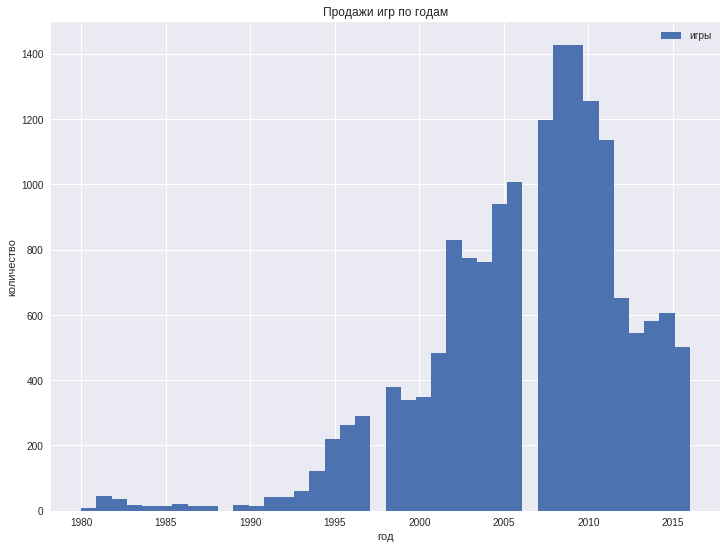

In [ ]:
games_without_trash = df.loc[df['year_of_release'] != 0]
games_without_trash.plot(kind='hist', y='year_of_release', bins=40,
                                          figsize=(12, 9), title='Продажи игр по годам', label='игры')
plt.ylabel('количество')
plt.xlabel('год')

Видим, что с 1990 года постепенно возрастало количество проданных игр, а в 2008-2009 был самый пик продажи игр, после чего тенденция идет на спад. Информация за все годы нам не важна.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [ ]:
platform_sales_pivot_table = pd.pivot_table(df, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales',ascending=False)
platform_sales_pivot_table

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [ ]:
best_sales_platform = list(platform_sales_pivot_table.index[:10])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [ ]:
for platform in best_sales_platform:
    platform_sales_pivot_table = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    print(platform_sales_pivot_table[1:])
    print()

                          total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

                          total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         20

In [ ]:
def plot_builder(df):
    df.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc=("sum")).plot(grid=True,figsize=(19, 10), fontsize=(14))


Text(0.5, 0, 'год')

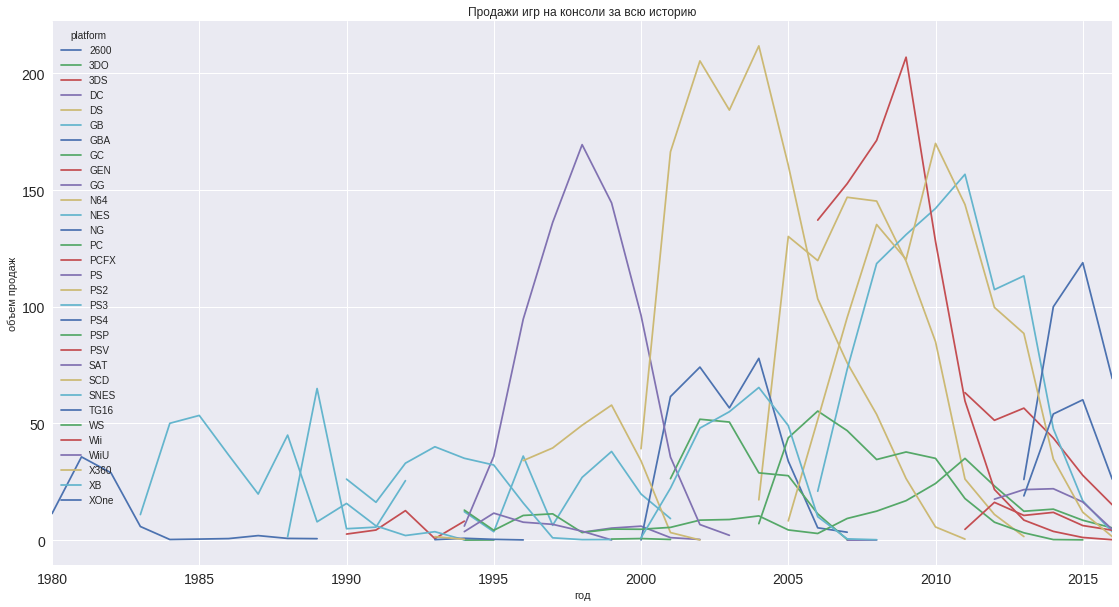

In [ ]:
plot_builder(games_without_trash)
plt.title('Продажи игр на консоли за всю историю')
plt.ylabel('объем продаж')
plt.xlabel('год')

In [ ]:
top_10_platform = games_without_trash.groupby(
    'platform')['total_sales'].agg(sum).sort_values(ascending=False).head(10).reset_index()
top_10_platform = list(top_10_platform['platform'])
top_10_platform = games_without_trash.query('platform in @top_10_platform')

Text(0.5, 0, 'год')

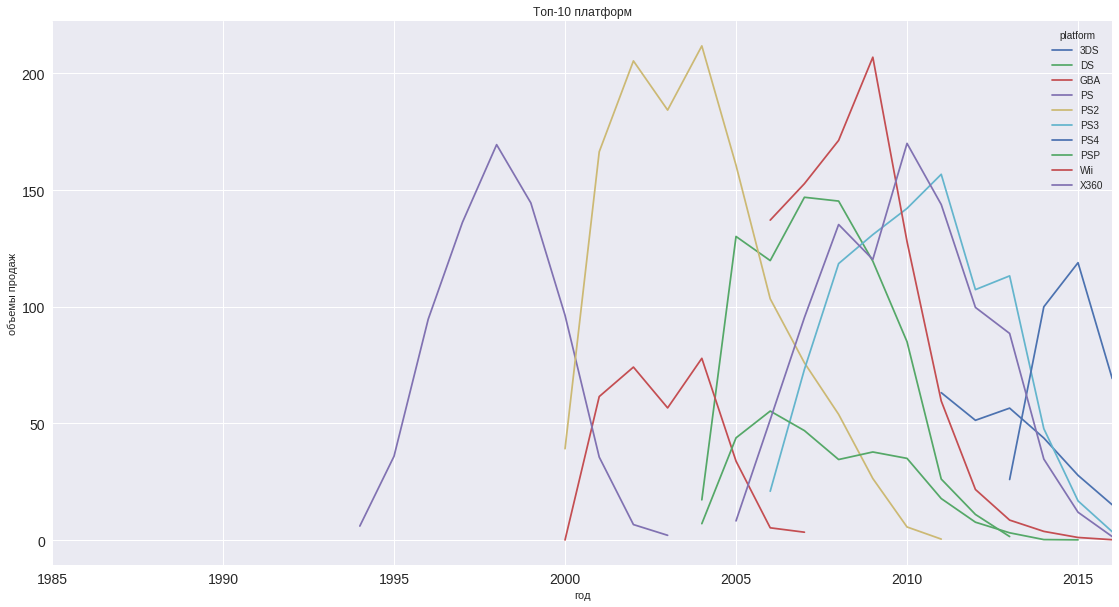

In [ ]:
plot_builder(top_10_platform)
plt.title('Топ-10 платформ')
plt.ylabel('объемы продаж')
plt.xlabel('год')

Из графика видно, что примерно за 7 лет появляются новые и исчезают старые платформы. Проверим.

In [ ]:
temp = games_without_trash.pivot_table(index=('platform','year_of_release'), aggfunc=(
    'count')).reset_index()
temp = temp.groupby('platform')['year_of_release'].agg("count").reset_index()
print('В среднем жизненный цикл консолей составляет: {} лет'
      .format(round(temp['year_of_release'].median())))

В среднем жизненный цикл консолей составляет: 7 лет


•	Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

•	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Text(0.5, 0, 'год')

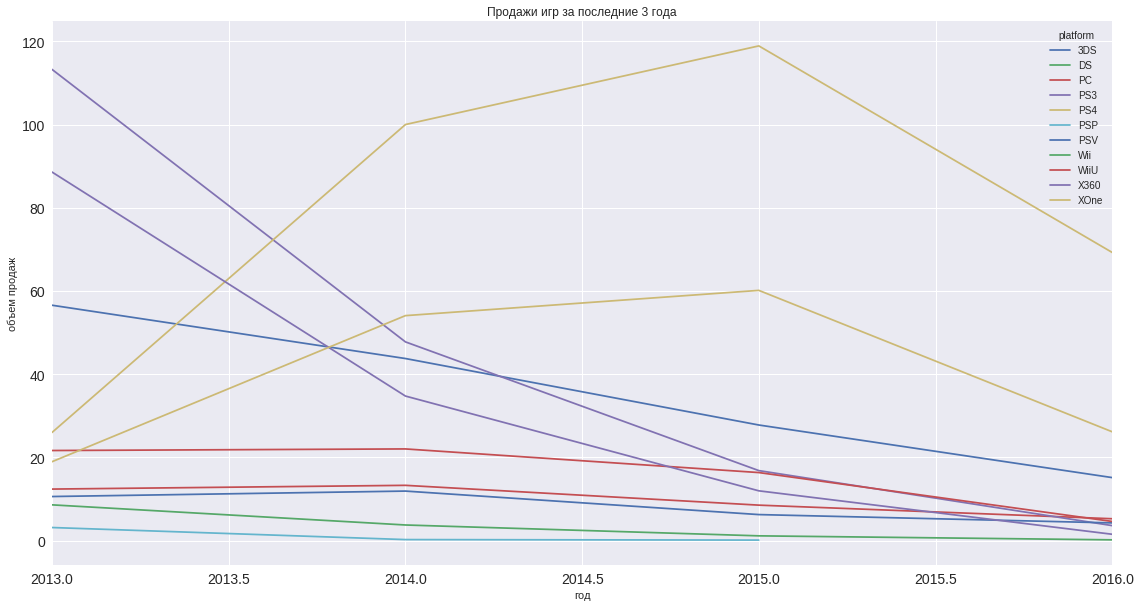

In [ ]:
actual_games = games_without_trash.query('year_of_release > 2012')
plot_builder(actual_games)
plt.title('Продажи игр за последние 3 года')
plt.ylabel('объем продаж')
plt.xlabel('год')

Как раз за 2013-2016 годы мы увидим, какие платформы уже не будут актуальны в 2017 году.
Например, для платформы PS4 пик продаж ожидается на 2017 год.

In [ ]:
actual_data_games_sales = df.query('year_of_release > 2012')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1300 non-null float64
rating             1256 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [ ]:
actual_data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [ ]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [ ]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Потенциально прибыльные платформы, топ-5: PS4, PS3, XOne,3DS X360.

In [ ]:
profit_platforms = ['PS4', 'PS3', 'XOne','3DS', 'X360']

Построим график «ящик с усами» по платформам. 

In [ ]:
#список актуальных платформ в 2016 году
platforms_in_2016 = df.query('year_of_release == 2016')['platform'].unique()
#срез по списку актульных платформ в 2016 году с 2013 года
actual_table = df.query('year_of_release >= 2013 and platform in @platforms_in_2016').reset_index()
#сводная таблица
actual_platforms = actual_table.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

Text(0.5, 1.0, 'Cравнение платформ')

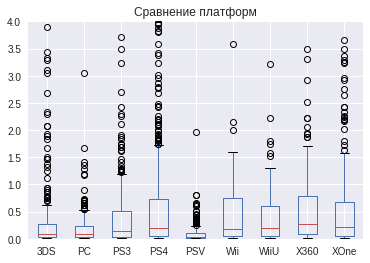

In [ ]:
actual_platforms_box = actual_table.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
actual_platforms_box.plot(kind='box', ylim=(0,4))
plt.title('Cравнение платформ')

In [ ]:
actual_table.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
PSV     0.092151
Name: total_sales, dtype: float64

Видим, что лидирует PS4. А меньше всего продаж PSV платформ.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмем платформу PS4.

In [ ]:
ps4_sales = actual_table.query('platform == "PS4"')
ps4_score = pd.DataFrame(ps4_sales[['critic_score','user_score', 'total_sales']])

In [ ]:
ps4_score.head()

,critic_score,user_score,total_sales
2,NaN,NaN,14.63
4,97.0,8.3,12.62
9,82.0,4.3,8.58
10,NaN,NaN,7.98
11,83.0,5.7,7.66


In [ ]:
ps4_score.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.509843,0.406568
user_score,0.509843,1.000000,0.029110
total_sales,0.406568,0.029110,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22eb27a3d0>,
      dtype=object)

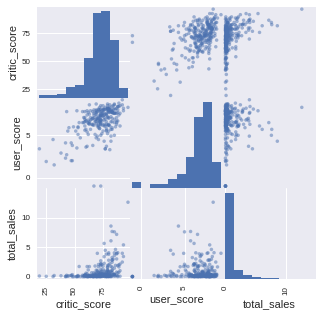

In [ ]:
pd.plotting.scatter_matrix(ps4_score, figsize=(5, 5))

Видим зависимость между продажами и оценками критиков.
А отзывы пользователей не влияют на покупку.

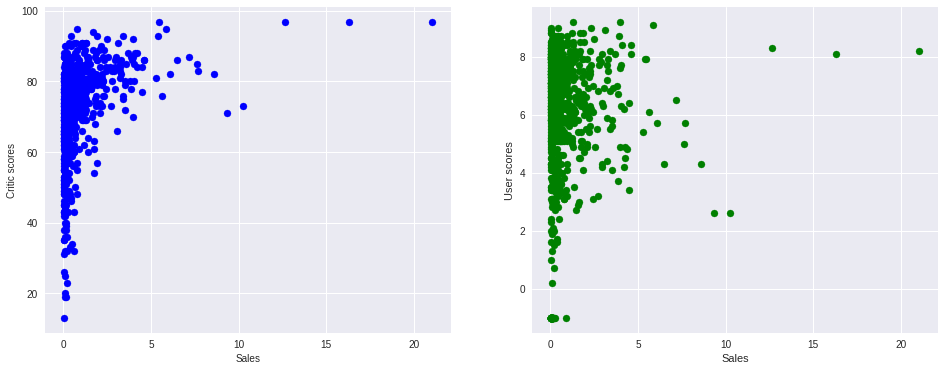

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 6)

axs[0].scatter(
    actual_table.query('platform in @profit_platforms')['total_sales'],
    actual_table.query('platform in @profit_platforms')['critic_score'],
    color='blue')
axs[0].grid(True)
axs[0].set_xlabel('Sales', fontsize=10)
axs[0].set_ylabel('Critic scores', fontsize=10)



axs[1].scatter(
    actual_table.query('platform in @profit_platforms')['total_sales'],
    actual_table.query('platform in @profit_platforms')['user_score'],
    color='green')
axs[1].grid(True)
axs[1].set_xlabel('Sales', fontsize=11)
axs[1].set_ylabel('User scores', fontsize=11)

plt.show()

In [ ]:
actual_table.query('platform in @profit_platforms')[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.521915,0.105671
critic_score,0.521915,1.000000,0.360374
total_sales,0.105671,0.360374,1.000000


**Вывод**

Из пяти выбранных платформ мы видим примерно одинаковую корреляцию между продажей и оценкой критиков.

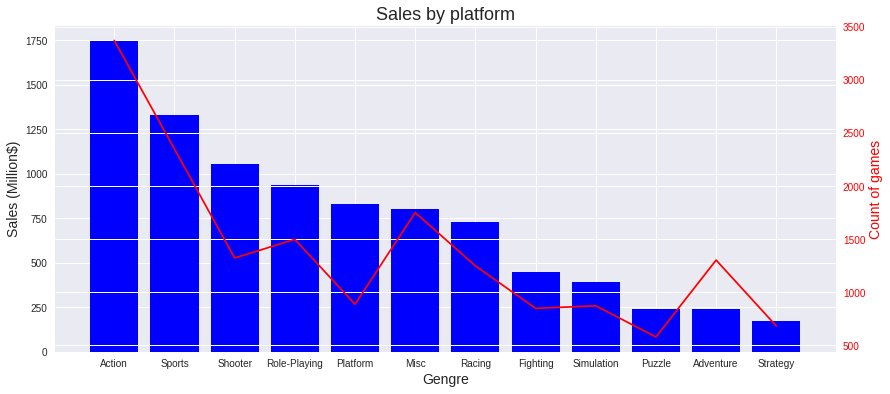

In [ ]:
sum_count_genres = df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
sum_count_genres.columns = ['sales', 'count_games']
sum_count_genres = sum_count_genres.sort_values(by='sales', ascending=False)

fig, ax1 = plt.subplots()
fig.set_size_inches([14,6])

# Plot first
ax1.set_title('Sales by platform', fontsize=18)
ax1.set_xlabel('Gengre', fontsize=14)
ax1.set_ylabel('Sales (Million$)', fontsize=14)
ax1.bar(sum_count_genres.index, sum_count_genres['sales'], width=0.8, color='blue')

# Plot second
ax2 = ax1.twinx()
ax2.set_ylabel('Count of games', color='r', fontsize=14)
ax2.plot(sum_count_genres.index, sum_count_genres['count_games'], color='red')
ax2.tick_params(axis='y', labelcolor='r')


plt.show()

Cредние продажи на одну игру из жанра:

In [ ]:
(sum_count_genres['sales'] / sum_count_genres['count_games']).sort_values(ascending=False)

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
dtype: float64

In [ ]:
actual_table.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.720817
Platform        0.582500
Role-Playing    0.508281
Racing          0.469294
Fighting        0.446709
Misc            0.428562
Action          0.426210
Simulation      0.353279
Puzzle          0.186471
Strategy        0.182909
Adventure       0.108531
Name: total_sales, dtype: float64

**Вывод**

**Самые прибыльные жанры:**

Sports

Shooter 

Role-Playing

Misc

**Игры с низкими продажами:**

Strategy 

Adventure 

Puzzle

# Портрет пользователя каждого региона

In [ ]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

In [ ]:
na_platforms = actual_table.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_platforms['%'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum() * 100
na_platforms

,na_sales,%
platform,,
PS4,108.74,24.875326
XOne,93.12,21.302100
X360,81.66,18.680514
PS3,63.50,14.526239
3DS,38.20,8.738619
WiiU,29.21,6.682070
PC,11.11,2.541520
Wii,6.56,1.500663
PSV,5.04,1.152949


In [ ]:
eu_platforms = actual_table.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_platforms['%'] = eu_platforms['eu_sales'] / eu_platforms['eu_sales'].sum() * 100
eu_platforms

,eu_sales,%
platform,,
PS4,141.09,36.065029
PS3,67.81,17.333401
XOne,51.59,13.187291
X360,42.52,10.868843
3DS,30.96,7.913908
PC,25.36,6.482452
WiiU,19.85,5.074001
PSV,6.10,1.559265
Wii,5.93,1.515810


In [ ]:
jp_platforms = actual_table.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_platforms['%'] = jp_platforms['jp_sales'] / jp_platforms['jp_sales'].sum() * 100
jp_platforms

,jp_sales,%
platform,,
3DS,67.81,49.319951
PS3,23.35,16.983053
PSV,18.59,13.520983
PS4,15.96,11.608117
WiiU,10.88,7.913303
X360,0.51,0.370936
XOne,0.34,0.247291
Wii,0.05,0.036366
PC,0.00,0.000000


Вывод:
В США топ-5: 

PS4	
XOne	
X360	
PS3	
3DS

В Европе все те же, но немного в другом порядке:

PS4	
PS3	
XOne	
X360	
3DS

В Японии:

3DS	
PS3	
PSV	
PS4	
WiiU

Популярные платформы в Японии отличаются от Европы и США.

Найдем самые популярные жанры в регионах.

In [ ]:
na_genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot_table

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [ ]:
eu_genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot_table

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [ ]:
jp_genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot_table

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Топ-5 жанров:

США:

Action	
Shooter	
Sports
Role-Playing	
Misc

Европа:

Action	
Shooter	
Sports	
Role-Playing
Racing

Япония:

Role-Playing	
Action	
Misc
Fighting	
Shooter

Снова Япония отличается от США и Европы. Возможно это связано с большим отличием культуры и менталитета.

Выясним влияние рейтинга ESRB на продажи в отдельном регионе

In [ ]:
na_rating_pivot_table = pd.pivot_table(actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [ ]:
eu_rating_pivot_table = pd.pivot_table(actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [ ]:
jp_rating_pivot_table = pd.pivot_table(actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


«EC» («Early childhood») — Для детей младшего возраста
«E» («Everyone») — Для всех
«E10+» («Everyone 10 and older») — Для всех от 10 лет и старше
«T» («Teen») — Подросткам
«M» («Mature») — Для взрослых
«AO» («Adults Only 18+») — Только для взрослых
«RP» («Rating Pending») — Рейтинг ожидается

Снова видны отличия между Японией и другими регионами. Если в США и Европе категории распределены так: 
Для взрослых, Для всех, Для всех старше 10 лет и  Подросткам
То в Японии: Подросткам, Для всех, Для взрослых и для всех старше 10 лет.

<div class="alert alert-info">

(CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт. Работает с июля 2002 года как ответвление Computer Entertainment Supplier's Association.

В Японии свои рейтинги:
  
Последнее обновление системы рейтингов организация провела в марте 2006 года, соответствующая буква помещается прямо на обложку. Продажа игр категории Z контролируется государством[1].

A — продукт подходит для всех возрастов. Наиболее известные представители: Pokemon, Dance Dance Revolution series, Disgaea, Armored Core, Ace Combat, Sonic Unleashed, Super Smash Bros. Brawl, Dragon Ball: Raging Blast, Need for Speed: Shift, Super Mario Galaxy 2, Sonic the Hedgehog (игра, 2006), Naruto: Ultimate Ninja, Split Second: Velocity, Final Fantasy IX.

B — продукт пригоден для людей от 12 лет и старше. Еще известные представители: Sengoku Basara series, Tekken, Burnout, Trauma Center, Street Fighter IV, Halo Wars, Tales of Vesperia, Valkyria Chronicles, Shin Megami Tensei: Persona 4, The Legend of Zelda: Twilight Princess, Alan Wake, Metroid: Other M, Parasite Eve.

C — продукт пригоден для людей от 15 лет и старше. Наиболее известные представители: Devil May Cry, WWE SmackDown vs. Raw, Lost Planet, Perfect Dark Zero, Soulcalibur IV, Dissidia: Final Fantasy, Midnight Club: Los Angeles, Silent Hill: Shattered Memories, Tekken, Metal Gear Solid: Peace Walker, Front Mission Evolved.

D — продукт пригоден для людей от 17 лет и старше. Наиболее известные представители: Yakuza, Ninja Gaiden, Bully, Resistance 2, Bayonetta, Resident Evil: The Darkside Chronicles, Dante's Inferno, Nier, Dead to Rights: Retribution, Halo: Reach, Vanquish, Metal Gear Solid V: The Phantom Pain.

Z — продукт пригоден для людей от 18 лет и старше. Наиболее известные представители: Grand Theft Auto, Assassin's Creed, Gears of War, InFamous, Left 4 Dead 2, MadWorld, God of War III, Dead Rising 2, Fallout: New Vegas, Call of Duty.
    
</div>

# Гипотезы

H₀: Средние пользовательские рейтинги платформ XboxOne и PC одинаковые

H₁: Средние пользовательские рейтинги платформ XboxOne и PC разные

<div class="alert alert-success">
<font size="5"<b>Комментарий ревьюера</b> </font>
    
**Успех**

Гипотезы сформированы верно
    
</div>

In [ ]:
# Создадим выборку по условиям для платформы XOne
games_XOne = actual_data_games_sales.query('user_score > 0 and platform=="XOne"')
games_XOne_final = games_XOne['user_score']
# Создадим выборку по условиям для платформы PC
games_PC = actual_data_games_sales.query('user_score > 0 and platform=="PC"')
games_PC_final = games_PC['user_score']

# Функция для проверки p-value

def ttest_independent(df1, df2):
    alpha = 0.05
    results = st.ttest_ind(df1, df2)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу, p-value:", results.pvalue)
    else:
        print("Не получилось отвергнуть нулевую гипотезу,  p-value:", results.pvalue)

In [ ]:
ttest_independent(games_XOne_final, games_PC_final)

Не получилось отвергнуть нулевую гипотезу,  p-value: 0.14012658403611647


In [ ]:
print('Средний пользовательский рейтинг "XOne":', games_XOne_final.mean())
print('Средний пользовательский рейтинг "PC":', games_PC_final.mean())

Средний пользовательский рейтинг "XOne": 6.521428571428572
Средний пользовательский рейтинг "PC": 6.2696774193548395


**Вывод**

Средние пользовательские рейтинги этих платформ почти одинаковы.

**Гипотезы для жанров**

H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [ ]:
user_rating_action = actual_data_games_sales.query('genre == "Action"')['user_score'].dropna()
user_rating_action.describe()

count    432.000000
mean       6.057407
std        2.666696
min       -1.000000
25%        5.600000
50%        7.000000
75%        7.700000
max        9.100000
Name: user_score, dtype: float64

In [ ]:
user_rating_Sports = actual_data_games_sales.query('genre == "Sports"')['user_score'].dropna()
user_rating_Sports.describe()

count    173.000000
mean       4.769364
std        2.379158
min       -1.000000
25%        3.400000
50%        5.400000
75%        6.300000
max        8.800000
Name: user_score, dtype: float64

In [ ]:
alpha = .05

results = st.ttest_ind(user_rating_action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7293269187498533e-08
Отвергаем нулевую гипотезу


Это значит что средние пользовательские рейтинги жанров Action и Sports разные. Проверим.

In [ ]:
print('Средний пользовательский рейтинг "Action":', user_rating_action.mean())
print('Средний пользовательский рейтинг "Sports":', user_rating_Sports.mean())

Средний пользовательский рейтинг "Action": 6.057407407407408
Средний пользовательский рейтинг "Sports": 4.76936416184971


# Общий вывод

Видим, что с 1990 года постепенно возрастало количество проданных игр, а в 2008-2009 был самый пик продажи игр, после чего тенденция идет на спад. 

В среднем жизненный цикл консолей составляет: 7 лет

Потенциально прибыльные платформы: PS4, PS3, XOne,3DS X360.

Объемы продаж отличаются на разных платформах. На PS3 был рекорд по продажам, на XOne видим из этих пяти платформ самый маленький рекорд в 7 млн.

Существует прямая зависимость между продажами и оценками критиков и пользователей.

Самые прибыльные жанры:

Action
Shooter
Sports
Role-Playing
Misc

По регионам:
В США топ-5 платформ:

PS4
XOne
X360
PS3
3DS

В Европе все те же, но немного в другом порядке:

PS4
PS3
XOne
X360
3DS

В Японии:

3DS
PS3
PSV
PS4
WiiU


Топ-5 жанров:

США:

Action
Shooter
Sports Role-Playing
Misc

Европа:

Action
Shooter
Sports
Role-Playing Racing

Япония:

Role-Playing
Action
Misc Fighting
Shooter

Снова Япония отличается от США и Европы. Возможно это связано с большим отличием культуры и менталитета.

Также видны отличия между Японией и другими регионами по категориям. Если в США и Европе категории распределены так: Для взрослых, Для всех, Для всех старше 10 лет и Подросткам То в Японии: Подросткам, Для всех, Для взрослых и для всех старше 10 лет.

Средний пользовательский рейтинг "XOne" и "PC" практически одинаковый.

Средние пользовательские рейтинги жанров Action и Sports разные. Рейтинг Sports выше.